In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
try:
    from enlighten_inference import EnlightenOnnxModel
except ImportError:
    !pip install git+https://github.com/arsenyinfo/EnlightenGAN-inference
    from enlighten_inference import EnlightenOnnxModel

In [2]:
img_1_path = "data/dark/images/1635955365488159418.png"
img_2_path = "data/dark/images/1635955365488159418.png"

### Read images

In [3]:
def read_image_and_convert_to_gray(image):
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img, gray


In [4]:
img_1, gray_image_1 = read_image_and_convert_to_gray(img_1_path)
img_2, gray_image_2 = read_image_and_convert_to_gray(img_2_path)

### Process images

In [5]:
def process_image_by_gun(image):
    model = EnlightenOnnxModel()
    img = cv2.imread(image)
    processed_img = model.predict(img)
    processed_gray = cv2.cvtColor(processed_img, cv2.COLOR_BGR2GRAY)
    return processed_img, processed_gray

In [6]:
processed_img_1, gray_processed_image_1 = process_image_by_gun(img_1_path)
processed_img_2, gray_processed_image_2 = process_image_by_gun(img_2_path)

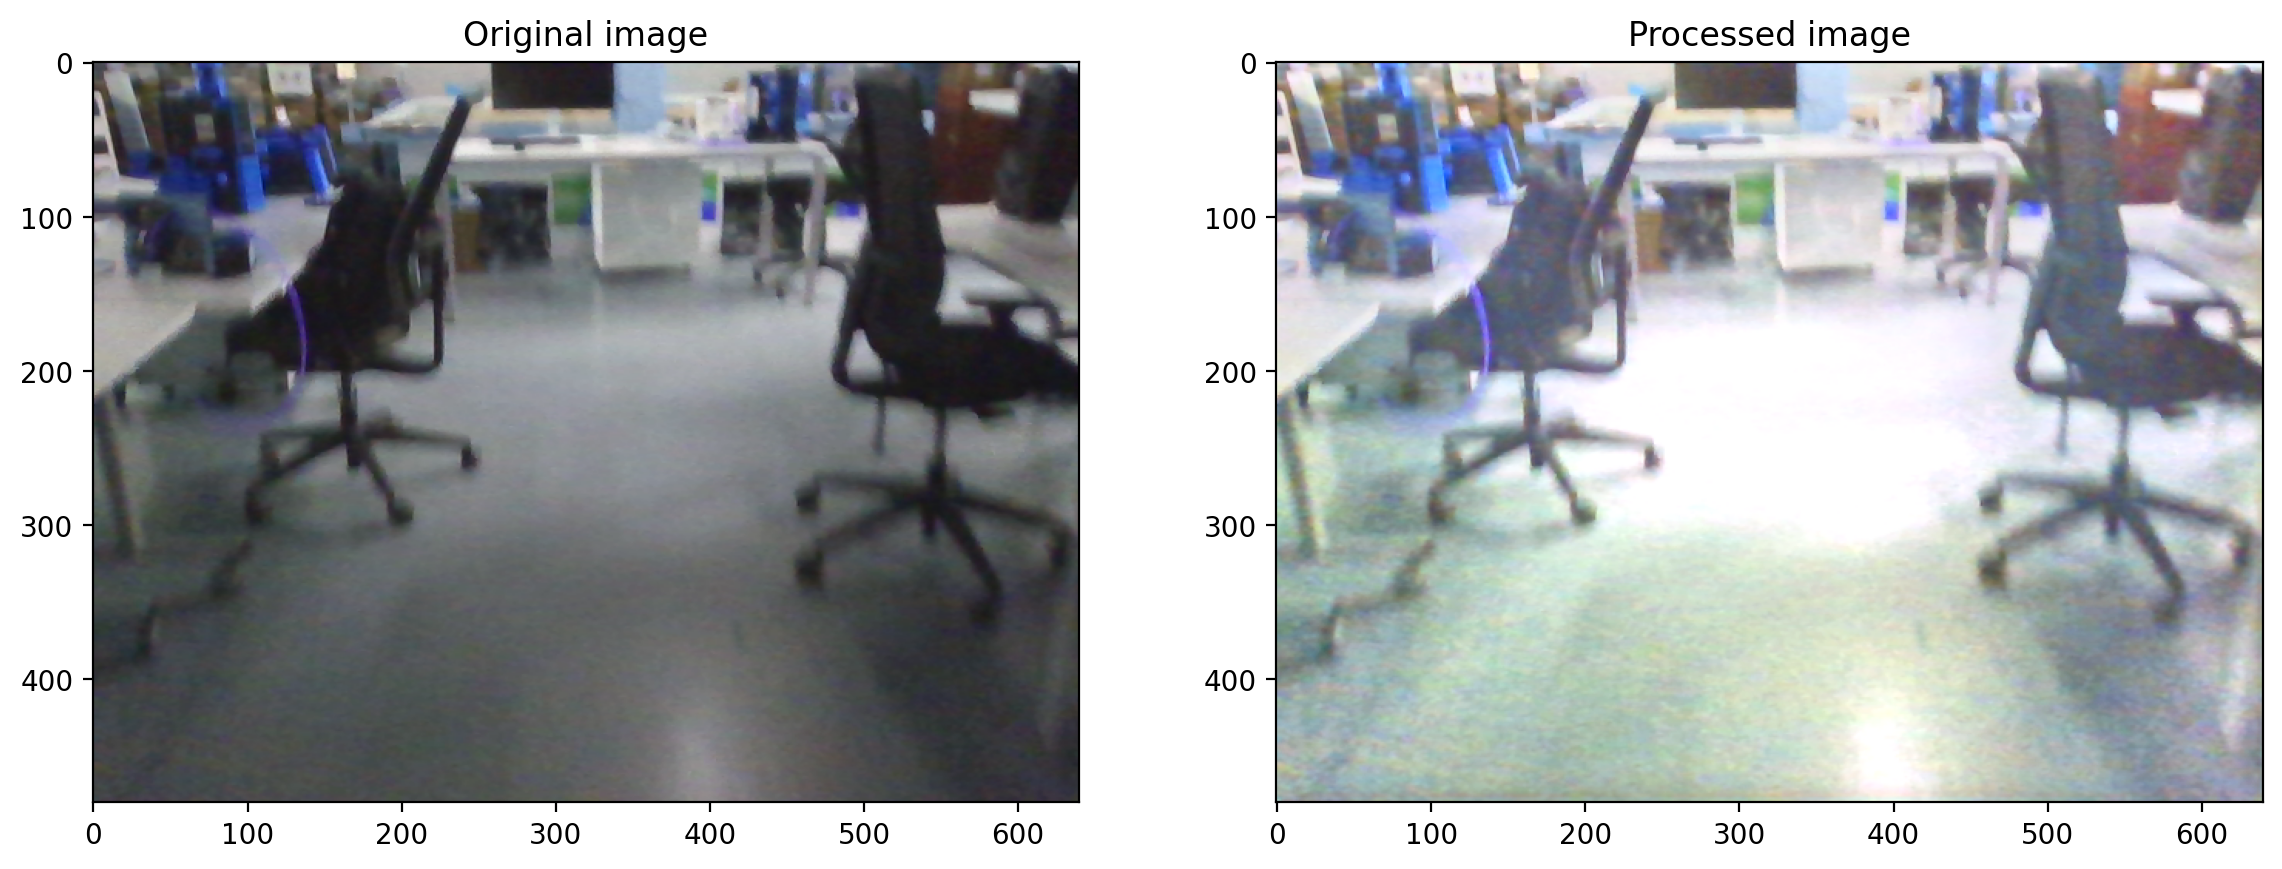

In [7]:
figure(figsize=(14, 10), dpi=200)

plt.subplot(1, 2, 1)
plt.imshow(img_1)
plt.title('Original image')

plt.subplot(1, 2, 2)
plt.imshow(processed_img_1)
plt.title('Processed image')

plt.show()

### Extract features from images

In [8]:
def orb_feature_exctraction(img):
    orb = cv2.ORB_create()
    kp, descr = orb.detectAndCompute(img, None)
    orb_img = cv2.drawKeypoints(img, kp, None)
    return orb_img, kp, descr

def sift_feature_exctraction(img):
    sift = cv2.xfeatures2d.SIFT_create()
    kp, descr = sift.detectAndCompute(img, None)
    sift_img = cv2.drawKeypoints(img, kp, None)
    return sift_img, kp, descr

def surf_feature_exctraction(img):
    surf = cv2.xfeatures2d.SURF_create()
    kp, descr = surf.detectAndCompute(img, None)
    surf_img = cv2.drawKeypoints(img, kp, None)
    return surf_img, kp, descr

In [9]:
orb_img_1, orb_keypoints_1, orb_descriptors_1 = orb_feature_exctraction(img_1)
orb_img_2, orb_keypoints_2, orb_descriptors_2 = orb_feature_exctraction(img_2)

orb_processed_img_1, orb_processed_keypoints_1, orb_processed_descriptors_1 = orb_feature_exctraction(processed_img_1)
orb_processed_img_2, orb_processed_keypoints_2, orb_processed_descriptors_2 = orb_feature_exctraction(processed_img_2)

In [10]:
sift_img_1, sift_keypoints_1, sift_descriptors_1 = sift_feature_exctraction(img_1)
sift_img_2, sift_keypoints_2, sift_descriptors_2 = sift_feature_exctraction(img_2)

sift_processed_img_1, sift_processed_keypoints_1, sift_processed_descriptors_1 = sift_feature_exctraction(processed_img_1)
sift_processed_img_2, sift_processed_keypoints_2, sift_processed_descriptors_2 = sift_feature_exctraction(processed_img_2)

In [11]:
surf_img_1, surf_keypoints_1, surf_descriptors_1 = surf_feature_exctraction(img_1)
surf_img_2, surf_keypoints_2, surf_descriptors_2 = surf_feature_exctraction(img_2)

surf_processed_img_1, surf_processed_keypoints_1, surf_processed_descriptors_1 = surf_feature_exctraction(processed_img_1)
surf_processed_img_2, surf_processed_keypoints_2, surf_processed_descriptors_2 = surf_feature_exctraction(processed_img_2)

### Feature matching

In [12]:
def feature_matching(img1, keypoints_1, descriptors_1, img2, keypoints_2, descriptors_2, N=50):
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    matches = sorted(bf.match(descriptors_1, descriptors_2), key = lambda x:x.distance)
    matched_img = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:N], img2, flags=2)
    return matched_img

In [13]:
orb_img_match = feature_matching(orb_img_1, orb_keypoints_1, orb_descriptors_1,
                                 orb_img_2, orb_keypoints_2, orb_descriptors_2)

orb_processed_img_match = feature_matching(orb_processed_img_1, orb_processed_keypoints_1, orb_processed_descriptors_1,
                                           orb_processed_img_2, orb_processed_keypoints_2, orb_processed_descriptors_2)

In [14]:
sift_img_match = feature_matching(sift_img_1, sift_keypoints_1, sift_descriptors_1,
                                  sift_img_2, sift_keypoints_2, sift_descriptors_2)

sift_processed_img_match = feature_matching(sift_processed_img_1, sift_processed_keypoints_1, sift_processed_descriptors_1,
                                            sift_processed_img_2, sift_processed_keypoints_2, sift_processed_descriptors_2)

In [15]:
surf_img_match = feature_matching(surf_img_1, surf_keypoints_1, surf_descriptors_1,
                                  surf_img_2, surf_keypoints_2, surf_descriptors_2)

surf_processed_img_match = feature_matching(surf_processed_img_1, surf_processed_keypoints_1, surf_processed_descriptors_1,
                                            surf_processed_img_2, surf_processed_keypoints_2, surf_processed_descriptors_2)

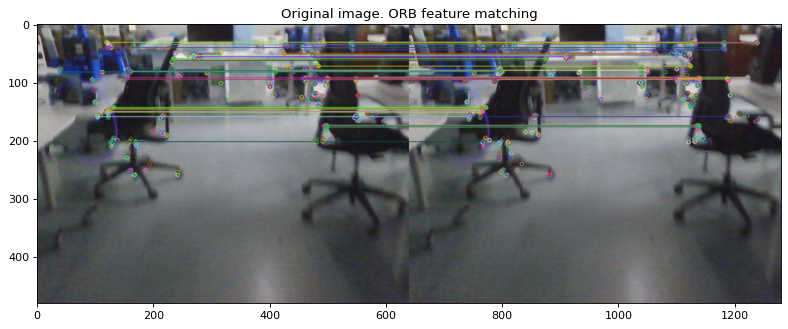

In [16]:
figure(figsize=(12, 8), dpi=80)
plt.imshow(orb_img_match)
plt.title('Original image. ORB feature matching')
plt.show()

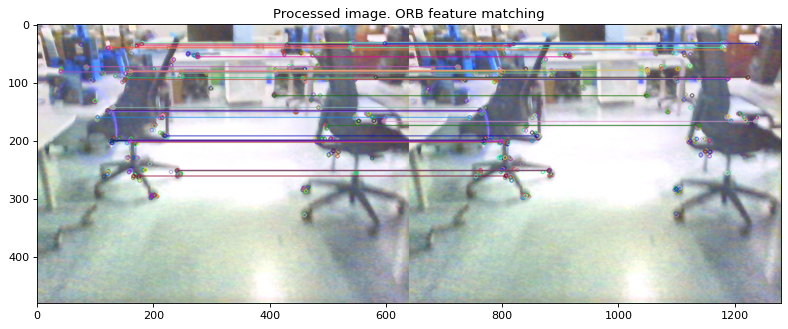

In [17]:
figure(figsize=(12, 8), dpi=80)
plt.imshow(orb_processed_img_match)
plt.title('Processed image. ORB feature matching')
plt.show()

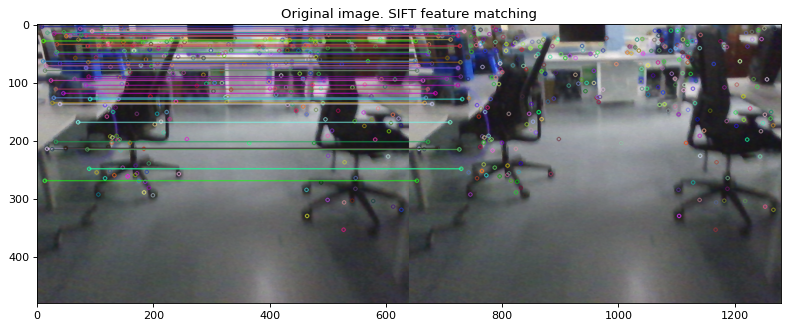

In [18]:
figure(figsize=(12, 8), dpi=80)
plt.imshow(sift_img_match)
plt.title('Original image. SIFT feature matching')
plt.show()

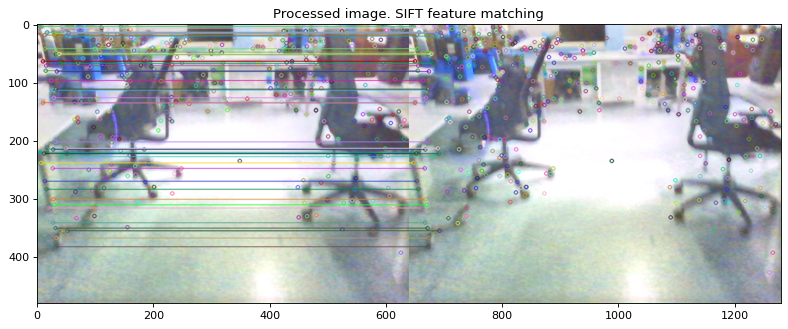

In [19]:
figure(figsize=(12, 8), dpi=80)
plt.imshow(sift_processed_img_match)
plt.title('Processed image. SIFT feature matching')
plt.show()

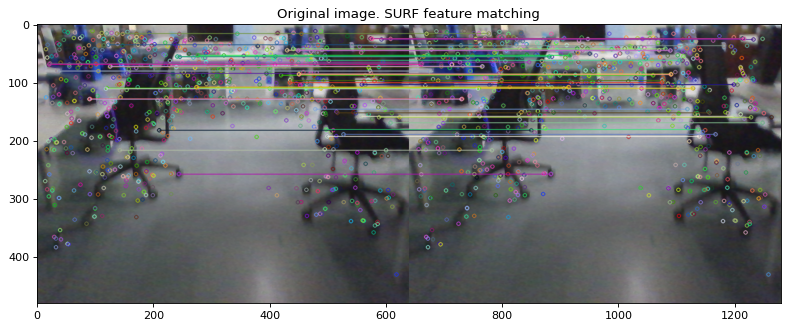

In [20]:
figure(figsize=(12, 8), dpi=80)
plt.imshow(surf_img_match)
plt.title('Original image. SURF feature matching')
plt.show()

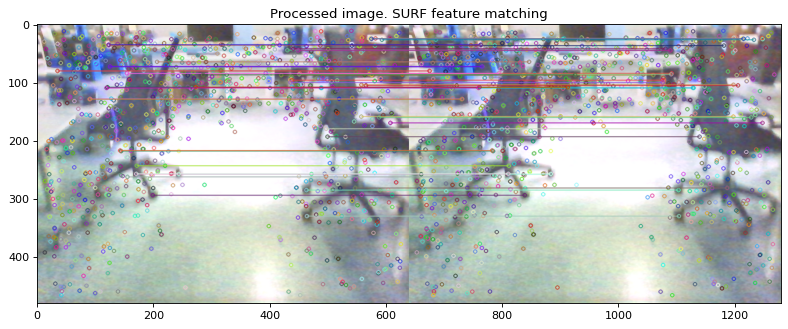

In [21]:
figure(figsize=(12, 8), dpi=80)
plt.imshow(surf_processed_img_match)
plt.title('Processed image. SURF feature matching')
plt.show()

### Only good matches

In [22]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [23]:
def only_good_matches(img1, keypoints_1, descriptors_1, img2, keypoints_2, descriptors_2, k=2, threshhold=0.7):
    matches = flann.knnMatch(descriptors_1, descriptors_2, k)
    matchesMask = [[0,0] for i in range(len(matches))]

    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < threshhold*n.distance:
            matchesMask[i]=[1,0]

    draw_params = dict(matchColor = (0,255,0),
                       singlePointColor = (255,0,0),
                       matchesMask = matchesMask,
                       flags = 0)

    img3 = cv2.drawMatchesKnn(img1, keypoints_1, 
                              img2, keypoints_2, 
                              matches, None, **draw_params)
    return img3

In [24]:
orb_img_good_matches = only_good_matches(img_1, orb_keypoints_1, np.float32(orb_descriptors_1),
                                         img_2, orb_keypoints_2, np.float32(orb_descriptors_2))
orb_img_processed_good_matches = only_good_matches(orb_processed_img_1, orb_processed_keypoints_1, np.float32(orb_processed_descriptors_1),
                                                   orb_processed_img_2, orb_processed_keypoints_2, np.float32(orb_processed_descriptors_2))

In [25]:
surf_img_good_matches = only_good_matches(img_1, surf_keypoints_1, surf_descriptors_1,
                                          img_2, surf_keypoints_2, surf_descriptors_2)
surf_img_processed_good_matches = only_good_matches(sift_processed_img_1, sift_processed_keypoints_1, sift_processed_descriptors_1,
                                                    sift_processed_img_2, sift_processed_keypoints_2, sift_processed_descriptors_2)

In [26]:
sift_img_good_matches = only_good_matches(img_1, sift_keypoints_1, sift_descriptors_1,
                                          img_2, sift_keypoints_2, sift_descriptors_2)
sift_img_processed_good_matches = only_good_matches(surf_processed_img_1, surf_processed_keypoints_1, surf_processed_descriptors_1,
                                                    surf_processed_img_2, surf_processed_keypoints_2, surf_processed_descriptors_2)

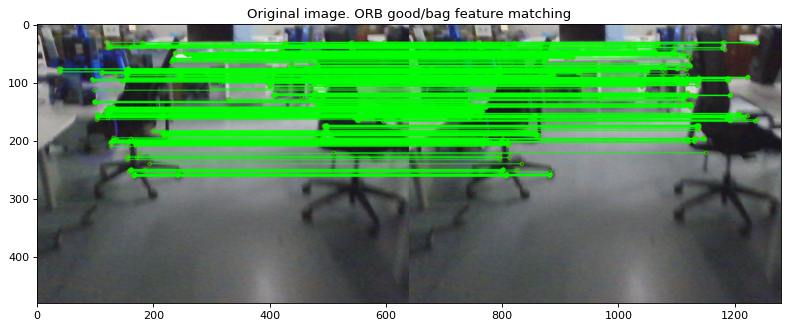

In [27]:
figure(figsize=(12, 8), dpi=80)
plt.imshow(orb_img_good_matches)
plt.title('Original image. ORB good/bag feature matching')
plt.show()

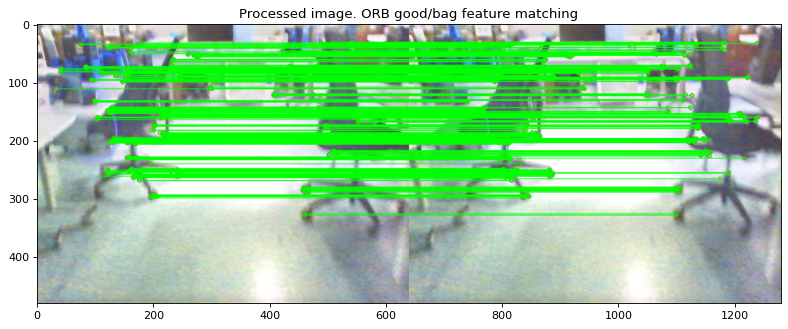

In [28]:
figure(figsize=(12, 8), dpi=80)
plt.imshow(orb_img_processed_good_matches)
plt.title('Processed image. ORB good/bag feature matching')
plt.show()


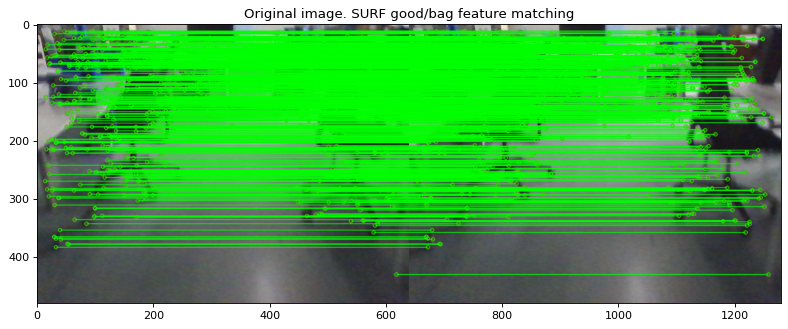

In [29]:
figure(figsize=(12, 8), dpi=80)
plt.imshow(surf_img_good_matches)
plt.title('Original image. SURF good/bag feature matching')
plt.show()

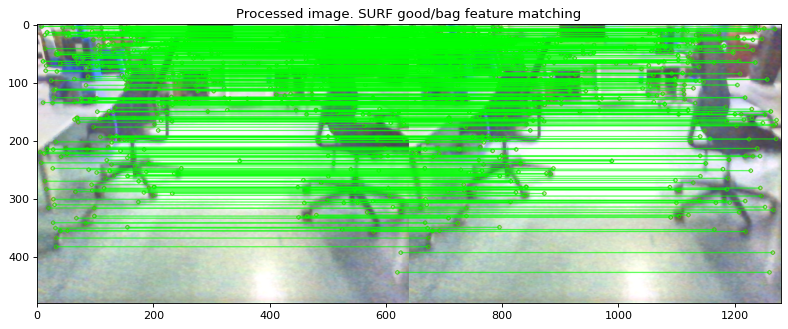

In [30]:
figure(figsize=(12, 8), dpi=80)
plt.imshow(surf_img_processed_good_matches)
plt.title('Processed image. SURF good/bag feature matching')
plt.show()

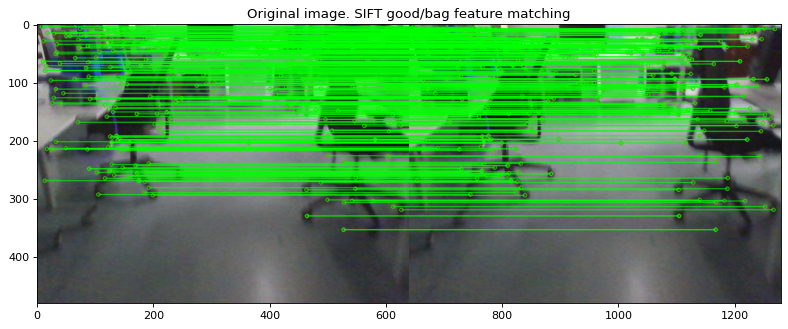

In [31]:
figure(figsize=(12, 8), dpi=80)
plt.imshow(sift_img_good_matches)
plt.title('Original image. SIFT good/bag feature matching')
plt.show()

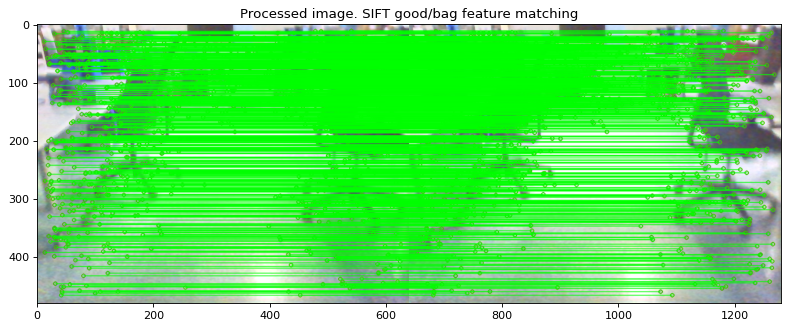

In [32]:
figure(figsize=(12, 8), dpi=80)
plt.imshow(sift_img_processed_good_matches)
plt.title('Processed image. SIFT good/bag feature matching')
plt.show()

In [33]:
from kapture_localization.matching.matching import MatchPairNnTorch
from torch.nn.functional import grid_sample
import torch

In [34]:
matcher = MatchPairNnTorch()


In [35]:
matches = matcher.match_descriptors(orb_descriptors_1, orb_descriptors_1)
# len(matches)

In [37]:
matched_keypoints1 = []
matched_keypoints2 = []
for match in matches:
    
    matched_keypoints1.append(orb_keypoints_1[int(match[0])])
    matched_keypoints2.append(orb_keypoints_1[int(match[1])])

matched_keypoints1 = np.array(matched_keypoints1)
matched_keypoints2 = np.array(matched_keypoints2)


In [99]:
import cv2

In [101]:
import kornia
params = cv2.UsacParams() 
fundamental_matrix, mask = cv2.findFundamentalMat(matched_keypoints1, matched_keypoints2, params)

AttributeError: module 'cv2.cv2' has no attribute 'UsacParams'